---
### Title: Schools of London: An Insightful Interactive Map 
- Author: Pooja Gohil
- Student id: 201772344
- Module : ENVS456 Web Mapping
- Assignment 02 : A dashboard of interactive map
- Submission Date: 02/05/2024
---

### Content

-   Part I   : Introduction
-   Part II  : Static Mapping
-   Part III : Choropleth Mapping
-   Part IV  : Interactive Mapping
-   Conclusion
-   References

## Part I: Introduction

-   **Substantive**

    -   `Title`: Schools of London: An Insightful Interactive Map with Dashboard

-   **Technical**
  
    -   `Interactivity`: Yes
    -   `Zoomable`: Yes
    -   `Tooltips`: Yes
    -   `Basemap`: yes
    -   `Choropleth`: yes
    -   `Dashboard`: yes
    -   `Technology`: Python, Folium, Leaflet provider, Choropleth Mapping, dashboard

-   **Datasets**

    -   `CSV File`:
        - `Source provider`: London Datastore - London Schools Atlasa "https://data.london.gov.uk/dataset/london-schools-atlas)
        - CSV : all_schools_xy.csv (2016)  (916.06 kB)
    
    -   `Shape File`:
        - `Source provider`London Datastore ["London Schools Atlas"](https://data.london.gov.uk/dataset/london-schools-atlas)        - `File`all_school_xy.shp (2016)  (457.72 kB)
    -   `Geo Jason Filee`:
        - `Source provider`: Cartography Vectors - ["Cartography Vectors"](https://cartographyvectors.com/map/421-london)
        - `File`: london_421.geojson
          


-   **AIM and Implementation**
  
    -   The interactive map and dashboard i have designed are helpful tools for exploring London's schools. By plotting schools on the map and providing detailed information about each one, the dashboard helps in understand London's schools based on:
    -   School Type: Whether the school is primary, secondary, or a combinati of both
    -   Gender Policy: The school's gender policy, indicating whether it is a boys', girls', or mixed.
    -   School Details: Additional information like the school's website, which can be accessed via tooltips for more information
    -   The aim of this project is to create a simple, easy-to-use platform that aluss you to search and find schools in London easily. Given London's fast pace and the large number of schools across the city, this tool provides a centralized hub for users to explore and understand London's educations

    -    By presenting key statistics and details on each school, such as location and type, the dashboarves you a full view of the educational options available. This helps parents, students, educators, and policymakers make informed decisions and learn more about london schools.

    -    The map and dashboard make information more accessible us help you understand the variety and location of schools in London. This can guide users in choosing schools based on their needs, and it provides an overview of the city's educational system

-   **Data Gathering and Mergingteg**    
-   Here's a summary of my data collection process and what I've done so far
  
    -    Dataset Research: I searched online for datasets related to schools in London and found a valuable source at the website "https://data.london.gov.uk/dataset/london-schools-atlas." This website offered two types of files for download: 
    -    CSV File: The CSV file contains data about schools in London, including coordinates (latitude and longitudes)
    -    Shapefile: The shapefile contains information on schools in Greater London in my map. 
    -    Data Review: I reviewed the CSV file in detail to understand the data and how it could be used to create both static and interactive maps. This attention to detail is important for creating accurate and insightful visualizations.
    -    GeoJSON File: To create a choropleth map, I needed a GeoJSON file to define the boundaries of London. I sourced this file from "Cartography Vectors," providing me with the necessary data to project London's geographic boundaries in my mapping project
    - By combining the data from these sources, I am well-equipped to move forward with my mapping project. The CSV file provides me with detailed information on the schools in London, while the GeoJSON file allows me to define London's geographic boundaries for creating a choropleth map. With this data, I can create static and interactive maps that offer valuable insights into the educational landscape of London .map.  

In [2]:
#Step 1: Import Required Libraries
import pandas as pd
import folium
import panel as pn
import geopandas as gpd  # Optional: only needed if working with shapefile
import matplotlib.pyplot as plt  # Optional: for additional visualizations
import seaborn as sns
from shapely.geometry import Point
import contextily as ctx
from folium.plugins import MarkerCluster
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore') # to ensure that warnings are suppressed from the outset
warnings.simplefilter('ignore')

# Set style and color palette
sns.set(style='whitegrid')

# Setting up Panel extension for Jupyter
pn.extension()


## Part II: Static Mapping

- `Data Preparation`:
    - The restaurant data from Yelp API is collected and stored in a DataFrame called 'resturants_df'
    - The latitude and longitude coordinates are extracted from the 'coordinates' column and stored in separate columns.
    - The 'alias' and 'title' columns are created to extract the category alias and title from the 'categories' column.
    - The DataFrame is converted into a GeoDataFrame 'gdf' to enable plotting geographic data. 

-   **Code Description**
  
    -   The code provided utilizes the Yelp API, which allow us to access information about various businesses, here i am fetching data for coffee shops, dessert places, wine and beer establishments. The Yelp API provides access to a vast database of business data, including details such as business names, addresses, ratings, and categories. In this code, an API key provided by Yelp is used to authenticate requests to the Yelp API.
    -   The search_yelp function sends requests to the Yelp API endpoint for business search (https://api.yelp.com/v3/businesses/search) with specific search terms like 'coffee', 'desserts', and 'beer_and_wine' for locations in London.
    -   However, a limitation of the Yelp API is its restriction to returning only 50 datasets in a single request. To overcome this limitation, I implemented pagination by incrementing the offset value, allowing me to fetch additional data for my map.By making multiple requests with different offset values, the function fetches a wide range of data for each category
    -   the code runs the search_yelp function 30 times, fetching 500 datasets for each category. Total 1500 data fetched in 58 seconds.The results are then combined into a single dataset named combined_results.


In [3]:
# Load the CSV file and shape file and create a GeoDataFrame and set the CRS
data = pd.read_csv('../data/all_schools_london.csv')
data['geometry'] = data.apply(lambda row: Point(row['x'], row['y']), axis=1)
data_gdf = gpd.GeoDataFrame(data, geometry='geometry')
data_gdf.crs = 'EPSG:4326'  #  the data uses WGS 84 (EPSG:4326)

# Convert data_gdf CRS to match the shapefile CRS (assuming shapefile CRS is EPSG:27700)
data_gdf = data_gdf.to_crs(epsg=27700)

# Load the shapefile and convert its CRS to match data_gdf's CRS
shapefile_path = '../data/All_schools_shp/school_data_london_Atlas_2016.shp'
london_gdf = gpd.read_file(shapefile_path)
london_gdf = london_gdf.to_crs(epsg=27700)

# Create a spatial mask to filter data points within the shapefile boundaries
mask = data_gdf.within(london_gdf.unary_union)
# Filter data points that are within the shapefile boundaries
data_gdf_filtered = data_gdf[mask]

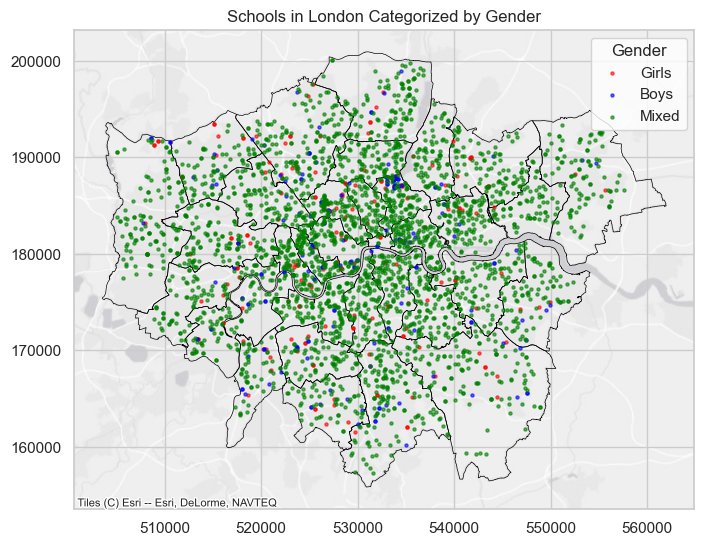

In [4]:
# Create a plot categorized by gender
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

# Plot the shapefile boundaries
london_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Plot the schools categorized by gender using the geometry column
colors = {'Girls': 'red', 'Boys': 'blue', 'Mixed': 'green'}
for gender, color in colors.items():
    # Filter the data by gender
    gender_df = data_gdf_filtered[data_gdf_filtered['GENDER'] == gender]
    
    # Plot the filtered data using geometry directly
    gender_df.plot(ax=ax, color=color, label=gender, marker='o',markersize=5, alpha=0.6)


# Add title and legend
ax.set_title('Schools in London Categorized by Gender')
ax.legend(title='Gender')

# Add a base map from contextily
#ctx.add_basemap(ax, crs=london_gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, crs= london_gdf.crs.to_string(), source = ctx.providers.Esri.WorldGrayCanvas)

# Show the plot
plt.show()


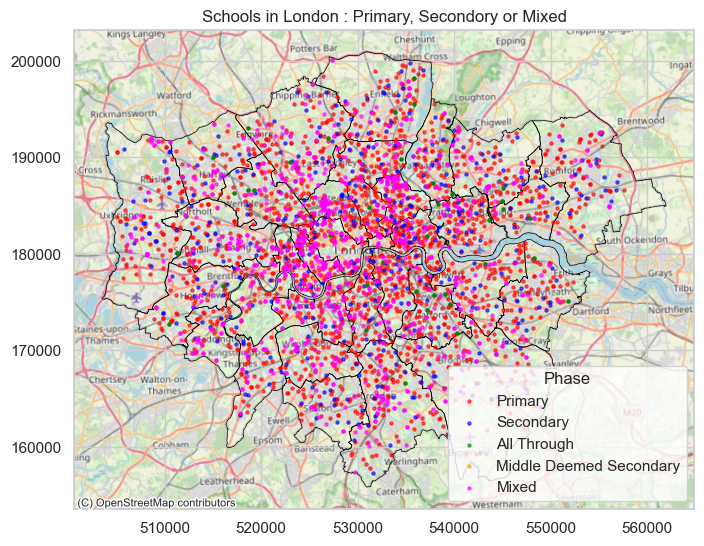

In [5]:
# Create a plot categorized by gender
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

# Plot the shapefile boundaries
london_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Plot the schools categorized by gender using the geometry column
colors = {'Primary': 'red', 'Secondary': 'blue', 'All Through': 'green', 'Middle Deemed Secondary' :'orange', 'Mixed' : 'magenta'}
for gender, color in colors.items():
    # Filter the data by gender
    gender_df = data_gdf_filtered[data_gdf_filtered['PHASE'] == gender]
    
    # Plot the filtered data using geometry directly
    gender_df.plot(ax=ax, color=color, label=gender, marker='o',markersize=5, alpha=0.6)


# Add title and legend
ax.set_title('Schools in London : Primary, Secondory or Mixed')
ax.legend(title='Phase')

# Add a base map from contextily
ctx.add_basemap(ax, crs=london_gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)
#ctx.add_basemap(ax, crs= london_gdf.crs.to_string(), source = ctx.providers.Esri.WorldGrayCanvas)

# Show the plot
plt.show()


## Part III: Choropleth Mapping

- `Data Merging`:
    - Creating a choropleth map displaying restaurant ratings across London regions
    - The CRS of the 'restaurant_geo' GeoDataFrame is reprojected to match the CRS of the boundary shapefile of London regions ('boundary_gdf').
    - A spatial join is performed between the London regions (from 'boundary_gdf') and the restaurants (from 'restaurant_geo') based on their spatial relationship..
    - The join operation is based on containment, meaning each London region contains some restaurants within its boundaries 

- `Plotting Choropleth`:
    - The merged data (London regions with restaurant ratings) is plotted as a choropleth map on the axis.
    - The color of each region is determined by its restaurant ratings, with a colormap ('Blues') applied.
    - A color scale (colorbar) is added to the plot to represent the range of restaurant ratings.
    - The colorbar is labeled with "Restaurant Ratings" and placed vertically next to the plot.

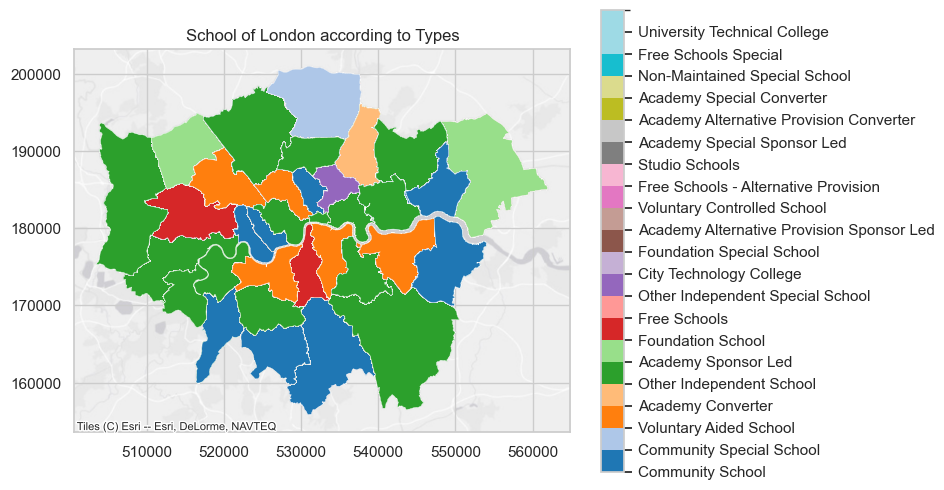

In [7]:
school_coro = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.x, data.y),crs='EPSG:4326')
school_coro = school_coro.to_crs(london_gdf.crs)

# Perform spatial join based on containment
merged_data = gpd.sjoin(london_gdf, school_coro, how='left', predicate='contains')

# Create a categorical colormap and normalize the categories
categories = merged_data['TYPE'].unique()
cmap = plt.get_cmap('tab20')
norm = mcolors.BoundaryNorm(boundaries=range(len(categories) + 1), ncolors=cmap.N+1)

# Create a dictionary to map each category to a color
category_to_color = {category: cmap(norm(i)) for i, category in enumerate(categories)}

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the merged data as a choropleth map using the categorical colormap
merged_data.plot(ax=ax, linewidth=0.3, color=merged_data['TYPE'].map(category_to_color), legend=True)

# Add a colorbar for categorical data
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # No data required for colorbar
cbar = plt.colorbar(sm, ticks=range(len(categories)), ax=ax, orientation='vertical')
cbar.ax.set_yticklabels(categories)

ax.set_title('School of London according to Types')

# Add base map using contextily
ctx.add_basemap(ax, crs= london_gdf.crs.to_string(), source = ctx.providers.Esri.WorldGrayCanvas)
plt.show()

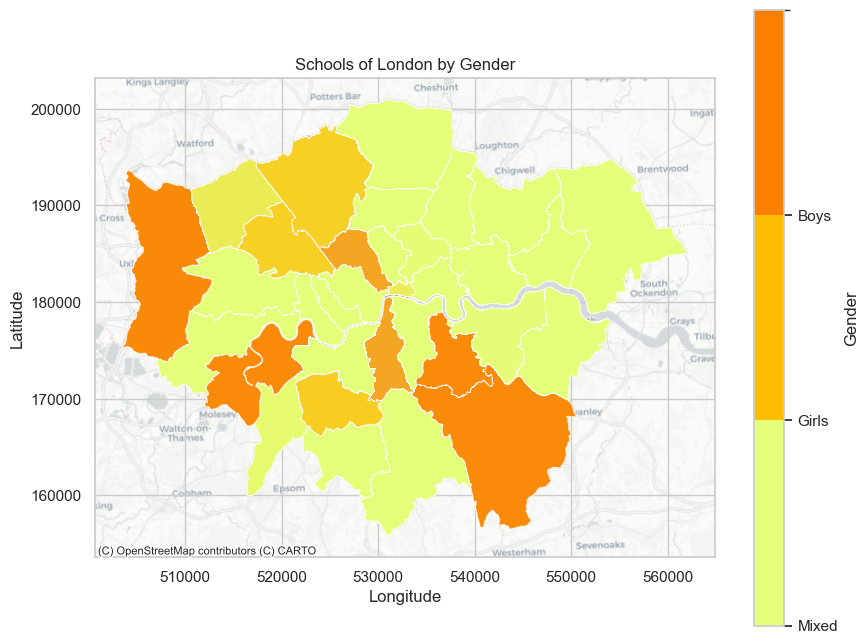

In [18]:
# Create a categorical colormap and normalize the categories
categories = merged_data['GENDER'].unique()
cmap = plt.get_cmap('Wistia')  # Use a visually appealing colormap
norm = mcolors.BoundaryNorm(boundaries=range(len(categories) + 1), ncolors=cmap.N)

# Create a dictionary to map each category to a color
category_to_color = {category: cmap(norm(i)) for i, category in enumerate(categories)}

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the merged data as a choropleth map
merged_data.plot(ax=ax, linewidth=0.5, color=merged_data['GENDER'].map(category_to_color), legend=True, alpha=0.7)

# Add a colorbar for categorical data
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # No data required for colorbar
cbar = plt.colorbar(sm, ticks=range(len(categories)), ax=ax, orientation='vertical')
cbar.ax.set_yticklabels(categories)
cbar.set_label('Gender')

# Set title and labels
ax.set_title('Schools of London by Gender')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add base map using contextily
ctx.add_basemap(ax, crs=london_gdf.crs, source=ctx.providers.CartoDB.Positron)

plt.show()

## Part IV: Interactive Mapping

- `Description`:
    - This interactive map showcases the vibrant culinary landscape of London, overlaying restaurant locations on a detailed geographic map. The map is centered around London with a zoom level set to capture a comprehensive view. Utilizing GeoJSON data, London's administrative boundaries are outlined in blue, with a yellow fill to distinguish them from the surrounding area.

    - Markers are clustered together for improved readability, making it easy for users to explore numerous restaurant locations within close proximity. Each marker represents a unique dining establishment and provides essential information such as the restaurant name, rating, address, and price range. Additionally, a thumbnail image of the restaurant is displayed in the marker's popup, offering users a visual preview of the dining experience.

    - Users can interact with the map by clicking on individual markers to view detailed information about each restaurant. The popup window dynamically adjusts to accommodate the restaurant's name, rating, address, price range, and an optional image. Moreover, a tooltip displays the restaurant's name and rating upon hovering over the marker, allowing for quick insights into nearby dining options. 

In [22]:
import plotly.express as px
from IPython.display import display, HTML
pn.extension('plotly')
type = sorted(data['PHASE'].unique().tolist())
type_selector = pn.widgets.Select(name='PHASE', options=type)
def schools_in_londonMap(df):
    geojson_file = "../data/london.geojson"
    map_london = folium.Map(location=[51.5, -0.12], zoom_start=10, control_scale=True)
    marker_cluster = MarkerCluster(name='School Markers').add_to(map_london)
    
    # Add markers for each school in the dataset to the marker cluster
    for index, row in df.iterrows():
        # Create a tooltip with the school name and town
        tooltip = folium.Tooltip(
            f"{row['SCHOOL_NAM']}<br>"
            f"{row['LSOA_NAME']}"
        )
    
        # Create a popup and add it to the marker cluster
        popup_content = (
            f"<b>School Name:</b> {row['SCHOOL_NAM']}<br>"
            f"<b>Type:</b> {row['TYPE']}<br>"
            f"<b>Phase:</b> {row['PHASE']}<br>"
            f"<b>Address:</b> {row['ADDRESS']}<br>"
            f"<b>Town:</b> {row['TOWN']}<br>"
            f"<b>Gender:</b> {row['GENDER']}<br>"
            f"<b>Website:</b> <a href='{row['WEBLINK']}' target='_blank'>{row['WEBLINK']}</a>"
    
        )
        popup = folium.Popup(popup_content, max_width=300)
       
        # Create a marker with the popup, tooltip, and custom icon
        folium.Marker(
            location=[row['y'], row['x']],
            popup=popup,
            icon=folium.Icon(icon='graduation-cap', prefix='fa', color='blue'),
            tooltip=tooltip
        ).add_to(marker_cluster)
    
    # Customize the appearance of the GeoJSON overlay
    style_function = lambda x: {'color': 'blue', 'fillColor': 'yellow', 'weight': 2, 'opacity': 0.6}
    
    # Add GeoJSON overlay to the map
    folium.GeoJson(geojson_file, style_function=style_function, name='London region').add_to(map_london)
    
    # Create and add different tilesets to the map
    folium.TileLayer(
        tiles='CartoDB Positron',
        name='CartoDB Positron',
        attr='Map tiles by CartoDB',
    ).add_to(map_london)
    
    # Add layer control
    folium.LayerControl().add_to(map_london)
    return map_london





# Load your data into a pandas DataFrame
df = pd.read_csv('../data/all_schools_london.csv')  # Update with your data file path


# Plot
def update_scatter(df):
       # Create a dashboard visualization using Plotly
    # For example, a bar chart of school types
    school_types = df['TYPE'].value_counts()
    fig = px.bar(school_types, x=school_types.index, y=school_types.values, title='Number of Schools by Type', labels={'x': 'Type', 'y': 'Count'})
    return fig



# Define the function to filter data based on the selected type
def filter_data(df, selected_type):
    # Filter the data to only include schools of the selected type
    if selected_type:
        filtered_df = df[df['PHASE'] == selected_type]
    else:
        filtered_df = df  # If no type is selected, use the entire dataframe
    return filtered_df#
# Update the components of the dashboard based on the dropdown selector
# @pn.depends(type_selector.param.value)
def update_components(df,selected_type):
    # Filter the data based on the selected type
    filtered_df = filter_data(df, selected_type)
    
    # Update the map using the filtered data
    map_pane = filter_data(filtered_df, selected_type)
    
    # Update the scatter plot using the filtered data
    plot = update_scatter(filtered_df)
    
    # Use GridSpec for layout
    grid = pn.GridSpec(width=1000, height=1000)
    #grid[0, 0:4] = type_selector
    grid[0:3, 0:8] = map_pane
    grid[7:10, 0:6] = plot
    
    return grid

map_pane = pn.bind(update_components, data,  type_selector.param.value)

# Layout the dashboard
dashboard = pn.Column(
    pn.Row(type_selector),
    map_pane
)

from bokeh.resources import INLINE
dashboard.save('../data/dashboard.html', embed=True, resources=INLINE)

# Layout the dashboard
# dashboard = pn.Column(update_components)
# dashboard.servable()


In [23]:
from IPython.display import HTML

# Assuming 'example.html' is your HTML file
with open('../data/dashboard.html', 'r',encoding='utf-8') as file:
    html_content = file.read()

# Display the HTML content in the notebook
HTML(html_content)


- `Categorization`:
  - A function 'map_alias' is defined to map restaurant aliases to broader categories such as 'coffee', 'sweets_n_desserts', 'wine_bars', and 'restaurants'
  - This function is applied to create a new column 'new_alias' in both the 'resturants_df' and 'gdf' DataFrames, categorizing the restaurants.

- `Plotting`:
  - CRS of the GeoDataFrame 'gdf' is set to WGS84 (EPSG:4326) initially and data is projected to the British Grid - London (EPSG:27700) to match the boundary shapefile. taken from : https://epsg.io/?q=great+britain
  - This function is applied to create a new column 'new_alias' in both the 'resturants_df' and 'gdf' DataFrames, categorizing the restaurants.
  - Colors and marker styles are defined for each restaurant category
  - Restaurants are plotted on the map using different colors and marker styles based on their categories.
  - The boundary layer is plotted with black edges to outline the boroughs.
  - A basemap from CartoDB.Positron is added to the map with contextily. taken from : https://xyzservices.readthedocs.io/en/stable/introduction.html

### Conclusion
- "Flavors of London - Mapping Restaurants and Cafés" is a comprehensive guide that enables users to explore London's diverse culinary scene. Leveraging the Yelp API, the map provides detailed insights into various dining options, including coffee shops, dessert spots, and wine bars, empowering users to make informed choices. By efficiently fetching data and categorizing establishments, the map enhances user experience, simplifying navigation through London's bustling food landscape. Through the integration of static and choropleth mapping techniques, users can visualize restaurant distributions and ratings across the city's regions using interactive map. Ultimately, "Flavors of London" offers an immersive journey through the city's culinary delights, serving as a trusted companion for culinary exploration and discovery.

### References

-   For an basics of static map, choloropeth map and interactive map  ["Web Mapping and Geovisualisation"](https://gdsl-ul.github.io/wma/) 
-   to learn in detail about folium and Easy practical guides to get things done with python [Taming Python](https://nagasudhir.blogspot.com/2021/07/).
-   to understand the detailed Restful web servises API and endpoints and all about backend [(yelp developer portal)](https://docs.developer.yelp.com/docs/getting-started)